## Embedding Space
- Objective: To explore and understand the properties of word embeddings through practical experimentation and manipulation, including performing semantic transformations and visualization techniques to interpret embedding spaces.

### 1. Exploring Word Embeddings:
- Download pre-trained word embeddings (e.g., GloVe, fastText) and select a set of words related to a specific domain of your choice.
- Perform operations on these word embeddings to explore semantic relationships. Examples of operations include finding the nearest neighbors for certain words, and performing algebraic operations like "king" - "man" + "woman" = "queen". Document your findings.

In [98]:
# Import libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Download pre-trained word embeddings
embedding_dict = {}
with open('/Users/talktalki/glove/glove.6B.100d.txt','r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        embedding_dict[word] = vectors
f.close()

In [99]:
# Function to find nearest neighbors
def find_nearest_neighbors(word, embedding_dict, topn=5):
    word_vector = embedding_dict[word].reshape(1, -1)
    similarities = cosine_similarity(word_vector, list(embedding_dict.values()))
    indices = np.argsort(similarities[0])[::-1][1:topn+1]
    neighbors = [list(embedding_dict.keys())[i] for i in indices]
    return neighbors

# Function to perform algebraic operation
def perform_algebraic_operation(embedding_dict, positive_words, negative_words, topn=1):
    result_vector = np.sum([embedding_dict[word] for word in positive_words], axis=0) - \
                    np.sum([embedding_dict[word] for word in negative_words], axis=0)
    result_vector = result_vector.reshape(1, -1)
    
    # Calculate cosine similarities with all words
    similarities = cosine_similarity(result_vector, list(embedding_dict.values()))[0]
    
    # Set to exclude positive and negative words
    exclusion_set = set(positive_words + negative_words)
    
    # Find the index with the maximum similarity that is not in the exclusion set
    for index in np.argsort(similarities)[::-1]:
        result_word = list(embedding_dict.keys())[index]
        if result_word not in exclusion_set:
            return result_word

In [100]:
# Find nearest neighbors
word_to_explore = 'king'
nearest_neighbors = find_nearest_neighbors(word_to_explore, embedding_dict, topn=5)
nearest_neighbors

['prince', 'queen', 'son', 'brother', 'monarch']

In [101]:
# Perform algebraic operations
result_word = perform_algebraic_operation(embedding_dict, positive_words=['woman', 'king'], negative_words=['man'], topn=1)
print(f"king - man + woman = {result_word}")

king - man + woman = queen


### 2. Visualization of Embedding Spaces:
- Use dimensionality reduction techniques (e.g., PCA, t-SNE) to visualize the high-dimensional word embeddings in 2D or 3D. Analyze and interpret the visualized clusters and distances between words.

In [102]:
# Visualize GLoVe word embeddings using t-SNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

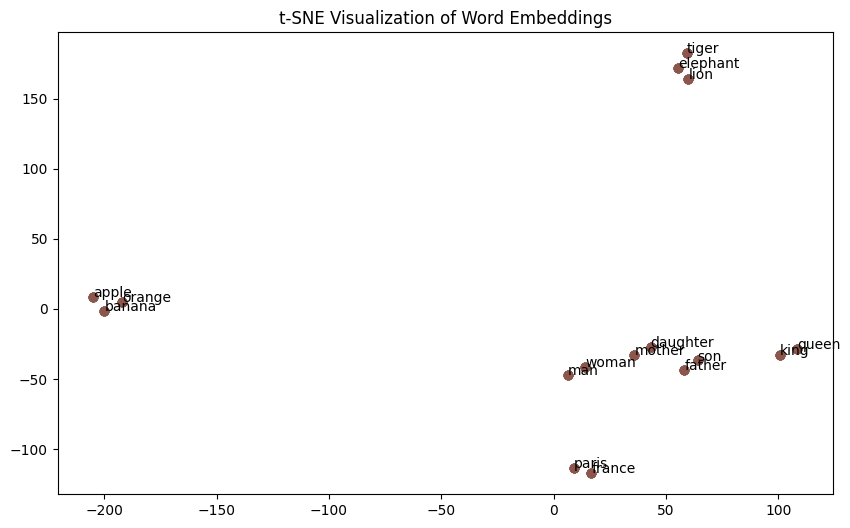

In [103]:
# Extract a subset of words for visualization
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'apple', 'banana', 'orange', 'elephant', 'lion', 'tiger', 'father', 'mother', 'son', 'daughter']  # List of words to visualize
#words = [word for word in w2v_small.index2word[200:300]]
# Extract their corresponding vectors
vectors = np.array([embedding_dict[word] for word in words])

# Perform dimensionality reduction using t-SNE
tsne = TSNE(perplexity=2, n_components=2, init='pca', n_iter=2500, random_state=23)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

- Words that are semantically similar or related appear closer to each other. Clusters form, indicating groups of words with similar meanings. For example, fruits form clusters, animals form clusters, etc.
- Distances between points provide a sense of semantic similarity. For example, words that are related to human beings are close in distance, compared to other words.

### 3. Transforming Embeddings for a Specific Task:
- Choose a specific task (e.g., bias reduction, domain adaptation) and modify the embeddings accordingly. For example, if choosing bias reduction, identify and reduce gender or ethnic bias in word associations.
- Apply the transformed embeddings to a simple NLP task (like text classification) and document the impact of the transformations.

In [104]:
g = embedding_dict['daughter'] - embedding_dict['son']
print(g)

[-0.11556     0.01552001 -0.06461     0.503555   -0.1709      0.01433998
 -0.00644     0.68334     0.44504    -0.057837    0.003686   -0.1027
 -0.261163    0.31252    -0.19175002  0.38377994 -0.23513001  0.49012002
  0.18992001  0.22784    -0.39858     0.15566     0.45533     0.58887
  0.20757002  0.264839    0.32347995 -0.54950994 -0.35379997 -0.03273004
  0.22637    -0.15908998  0.79824    -0.3138      0.2985     -0.15731
  0.22541    -0.12077801  0.27823     0.1533     -0.29459    -0.34570003
 -0.60727996  0.36170006  0.19728981  0.004855   -0.23686999  0.09321401
  0.43361998  0.21271999  0.45634001 -0.01115999  0.15205997  0.20627004
 -0.00261    -0.1099999   0.31779003 -0.280985   -0.40869     0.014378
 -0.21508998  0.28757    -0.208473    0.180474   -0.30163002  0.241617
 -0.00717002  0.10164002  0.41897202 -0.45290998 -0.020552   -0.05595998
 -0.003961    0.37620997  0.17900799  0.53876     0.216196   -0.44065
 -0.00620002 -0.52551    -0.66573     0.03257999  0.40880004  0.4224

In [105]:
print ('List of names and their similarities with constructed vector:')

# girls and boys name
name_list = ['john', 'marie', 'sophie', 'ronaldo', 'priya', 'rahul', 'danielle', 'reza', 'katy', 'yasmin']

for w in name_list:
    print (w, cosine_similarity(embedding_dict[w].reshape(1, -1), g.reshape(1, -1)))

List of names and their similarities with constructed vector:
john [[-0.16643088]]
marie [[0.30063713]]
sophie [[0.3859805]]
ronaldo [[-0.22882032]]
priya [[0.2920704]]
rahul [[-0.04099009]]
danielle [[0.32130572]]
reza [[-0.1580585]]
katy [[0.25465906]]
yasmin [[0.18590957]]


In [106]:
print('Other words and their similarities:')
word_list = ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer']
for w in word_list:
    print (w, cosine_similarity(embedding_dict[w].reshape(1, -1), g.reshape(1, -1)))

Other words and their similarities:
lipstick [[0.2219505]]
guns [[-0.01096461]]
science [[-0.02232002]]
arts [[-0.02200732]]
literature [[-0.00238028]]
warrior [[-0.12932234]]
doctor [[-0.04525851]]
tree [[0.06119714]]
receptionist [[0.24710184]]
technology [[-0.10761099]]
fashion [[0.1457473]]
teacher [[0.00328759]]
engineer [[-0.25954217]]
pilot [[-0.11932626]]
computer [[-0.07653051]]
singer [[0.07137375]]


In [107]:
def neutralize(word, g, word_to_vec_map):
    """
    Removes the bias of "word" by projecting it on the space orthogonal to the bias axis. 
    This function ensures that gender neutral words are zero in the gender subspace.
    
    Arguments:
        word -- string indicating the word to debias
        g -- numpy-array of shape (n,), corresponding to the bias axis (such as gender)
        word_to_vec_map -- dictionary mapping words to their corresponding vectors.
    
    Returns:
        e_debiased -- neutralized word vector representation of the input "word"
    """
    
    e = word_to_vec_map[word]
    e_biascomponent = np.dot(e, g) / np.dot(g, g) * g
    e_debiased = e - e_biascomponent
    
    return e_debiased

In [108]:
e = "receptionist"
print(f"cosine similarity between {e} and gender, before neutralizing: {cosine_similarity(embedding_dict[w].reshape(1, -1), g.reshape(1, -1))}")

e_debiased = neutralize("receptionist", g, embedding_dict)
print(f"cosine similarity between {e} and gender, after neutralizing : {cosine_similarity(e_debiased.reshape(1, -1), g.reshape(1, -1))}")

cosine similarity between receptionist and gender, before neutralizing: [[0.07137375]]
cosine similarity between receptionist and gender, after neutralizing : [[3.7252903e-09]]


Data source/References:
- GloVe: https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation
- Transformation: https://www.kaggle.com/code/ritvik1909/debiasing-word-vectors#Debiasing-word-vectors